In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from influence.influence_model import InfluenceModel

## Data

We use the MNIST dataset, consisting of images of handwritten digits, and their respective labels.

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

categorical_train_labels = tf.keras.utils.to_categorical(train_labels)
categorical_test_labels = tf.keras.utils.to_categorical(test_labels)

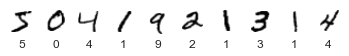

In [5]:
plt.figure()
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Model

We use a logistic regression model to classify each image.

In [6]:
tf.keras.backend.set_floatx('float64')

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, kernel_regularizer='l2', bias_regularizer='l2')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

*Note: As Scipy uses float64 by default, running our model in float64 saves time by reducing need for casting.*

*Note: Auto-differentiation is not supported for tf.keras.losses.SparseCategoricalCrossentropy(), hence we use tf.keras.losses.CategoricalCrossentropy() instead, and we have processed our labels as needed.*

In [7]:
model.fit(
    train_images,
    categorical_train_labels,
    epochs=10,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 119us/sample - loss: 0.7892 - accuracy: 0.8585 - val_loss: 0.6235 - val_accuracy: 0.9072
Epoch 2/10
54000/54000 [==============================] - 6s 105us/sample - loss: 0.6942 - accuracy: 0.8855 - val_loss: 0.6234 - val_accuracy: 0.9108
Epoch 3/10
54000/54000 [==============================] - 6s 102us/sample - loss: 0.6945 - accuracy: 0.8858 - val_loss: 0.6285 - val_accuracy: 0.9090
Epoch 4/10
54000/54000 [==============================] - 6s 102us/sample - loss: 0.6939 - accuracy: 0.8863 - val_loss: 0.6213 - val_accuracy: 0.9117
Epoch 5/10
54000/54000 [==============================] - 6s 103us/sample - loss: 0.6945 - accuracy: 0.8849 - val_loss: 0.6242 - val_accuracy: 0.9115
Epoch 6/10
54000/54000 [==============================] - 5s 101us/sample - loss: 0.6949 - accuracy: 0.8847 - val_loss: 0.6265 - val_accuracy: 0.9133
Epoch 7/10
54000/54000 [===========================

In [8]:
%%time

influence_model = InfluenceModel(
    model,
    train_images,
    categorical_train_labels,
    model.loss,
    0,
    damping=0.1,
    dtype=np.float64,
    verbose=True
)

influence_model.get_influence_on_loss(
    test_images[0],
    categorical_test_labels[0]
)

Calculating inverse HVP using Conjugate Gradient method:
Current error: 4.539898843434823 , Relative error: 0.6540244698030632
Current error: 6.958545621541236 , Relative error: 1.0024582634281047
Current error: 1.5025391941455872 , Relative error: 0.21645799470410546
Current error: 1.1594706099925718 , Relative error: 0.1670350325204361
Current error: 1.2568639881735268 , Relative error: 0.18106566507940644
Current error: 0.49576814000317043 , Relative error: 0.07142108361725204
Current error: 0.3617989344115435 , Relative error: 0.05212128384666729
Current error: 0.2787610411255575 , Relative error: 0.040158723445466574
Current error: 0.13800081177993445 , Relative error: 0.019880598856796907
Current error: 0.1150232159181661 , Relative error: 0.016570412777965202
Current error: 0.10296123515515135 , Relative error: 0.014832746181117223
Current error: 0.05428269813556518 , Relative error: 0.007820044915523332
Current error: 0.03818745730862594 , Relative error: 0.0055013409727219945


-0.08112733098883013

In [9]:
%%time

influence_model = InfluenceModel(
    model,
    train_images,
    categorical_train_labels,
    model.loss,
    0,
    damping=0.1,
    dtype=np.float64,
    verbose=True,
    cg_tol=1e-02
)

influence_model.get_influence_on_loss(
    test_images[0],
    categorical_test_labels[0]
)

Calculating inverse HVP using Conjugate Gradient method:
Current error: 4.539898843434823 , Relative error: 0.6540244698030632
Current error: 6.958545621541236 , Relative error: 1.0024582634281047
Current error: 1.5025391941455872 , Relative error: 0.21645799470410546
Current error: 1.1594706099925718 , Relative error: 0.1670350325204361
Current error: 1.2568639881735268 , Relative error: 0.18106566507940644
Current error: 0.49576814000317043 , Relative error: 0.07142108361725204
Current error: 0.3617989344115435 , Relative error: 0.05212128384666729
Current error: 0.2787610411255575 , Relative error: 0.040158723445466574
Current error: 0.13800081177993445 , Relative error: 0.019880598856796907
Current error: 0.1150232159181661 , Relative error: 0.016570412777965202
Current error: 0.10296123515515135 , Relative error: 0.014832746181117223
Current error: 0.05428269813556518 , Relative error: 0.007820044915523332
Optimization terminated successfully.
         Current function value: -90.

-0.07672681223332037

In [10]:
%%time

influence_model = InfluenceModel(
    model,
    train_images,
    categorical_train_labels,
    model.loss,
    0,
    dtype=np.float64,
    verbose=True,
    method='lissa',
    scaling=0.01,
    lissa_samples=2,
    lissa_depth=500
)

influence_model.get_influence_on_loss(
    test_images[0],
    categorical_test_labels[0]
)

Calculating inverse HVP using LiSSA method:
Sample 1 with depth 500 - Current error: 0.04062685116835949 , Relative error: 0.5852763752101179
Sample 2 with depth 500 - Current error: 0.041336604361159573 , Relative error: 0.5955011837795636
Overall error: 0.039850383019833555 , Overall relative error: 0.574090461205803
Wall time: 16 s


-0.05627619461906666

In [11]:
%%time

influence_model = InfluenceModel(
    model,
    train_images,
    categorical_train_labels,
    model.loss,
    0,
    dtype=np.float64,
    verbose=True,
    method='lissa',
    scaling=0.01,
    lissa_samples=1,
    lissa_depth=1000
)

influence_model.get_influence_on_loss(
    test_images[0],
    categorical_test_labels[0]
)

Calculating inverse HVP using LiSSA method:
Sample 1 with depth 1000 - Current error: 0.06468555262149593 , Relative error: 0.9318695561682443
Overall error: 0.06468555262149593 , Overall relative error: 0.9318695561682443
Wall time: 16.1 s


-0.06447038857042435

In [12]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]